## K-means是什麼嗎？
* 一種分群常見的方法(Cluster)
* 屬於非監督式學習（簡單說就是沒有正確解答，只有data本身)
* 「物以類聚」：相同的資料，距離會比較近，視為一群，反之，視為不同群。
* 距離定義可為Euclidean Distance、Cosine Distance。
* 運用領域：推薦系統、圖片壓縮等等
* Visualizing K-Means Clustering web：https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)
* 數學式：
![Algorithm](Algorithm.PNG )

## 示意圖
![kmean](kmean.png )

## step1.匯入需要的套件

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
cdata= pd.read_csv("cdata.csv")
%matplotlib inline  

## step2.初步看資料（以兩維的資料作為範例）

In [2]:
cdata.describe()

,x,y,cluster
count,300.000000,300.000000,300.000000
mean,3.967821,-0.006327,1.500000
std,2.593964,1.635999,1.119902
min,-0.765900,-3.122400,0.000000
25%,1.916050,-1.498825,0.750000
50%,3.529000,-0.044500,1.500000
75%,5.607675,1.433350,2.250000
max,9.282900,3.437600,3.000000


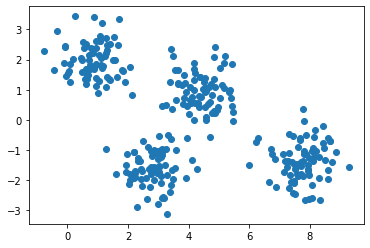

In [3]:
plt.scatter(cdata["x"], cdata["y"])

## step3. k_means演算法

1. select K points as the initial centroids.
2. repeat
3.   From K clusters by assigning all ponits to the closest centroids.
4.   Recompute the centroid of each cluster.
5. until The centroids don't change.

### 1. 主程式、找新中心點、分配各類群、是否隨機、是否畫圖

In [4]:
#找出中心點
def new_centroid(cdata):
    new_center_data=cdata.groupby("types").mean()
    center_list=[(new_center_data.iloc[t]["x"],new_center_data.iloc[t]["y"]) for t in range(0,len(new_center_data))]
    return center_list

In [5]:
#以中心點為中心，分配哪一群
def assign_cluster_each_point(cluster,n,center_list):
    global cdata
    for b in range(0,len(cdata)):
        target=(cdata.iloc[b]["x"],cdata.iloc[b]["y"]) 
        types=0
        mins_dif=100000
        for j in range(0,n):
            x_dif=(target[0]-center_list[j][0])**2+(target[1]-center_list[j][1])**2
            if mins_dif>x_dif:
                types=j+1
                mins_dif=x_dif
        cluster.append(types)
    cdata["types"]=cluster

In [6]:
#決定是否要隨機
def randon_or_not(n,random_or_not):
    global cdata
    if random_or_not==False:
        init_sample=cdata.sample(n, replace=False,random_state=1314)
    else:
        init_sample=cdata.sample(n, replace=False)
    return init_sample

In [7]:
#是否畫圖
def draw_plot(axs,center_list,draw_plt,rep_times):
    global cdata
    if draw_plt==True:
        axs[rep_times].scatter(cdata["x"], cdata["y"],c=cdata["types"])
        for x in range(0,len(center_list)):
            axs[rep_times].scatter(center_list[x][0], center_list[x][1],marker="x")

In [8]:
#主程式
def k_means(n,data,draw_plt,random_or_not):
    rep_times=0
    init_sample=randon_or_not(n,random_or_not)
    center_list=[(init_sample.iloc[t]["x"],init_sample.iloc[t]["y"]) for t in range(0,len(init_sample))]
    cdata["types"]=[0]*len(cdata)
    if draw_plt==True:
        fig, axs = plt.subplots(3)
    else:
        axs=0
    while rep_times<3:
        cluster=[]
        cluster=assign_cluster_each_point(cluster,n,center_list)
        center_list=new_centroid(cdata)
        draw_plot(axs,center_list,draw_plt,rep_times)
        rep_times=rep_times+1
    return cdata,center_list

### 2. get_SSE得到sum of square error

In [9]:
def get_SSE(data,center_list):
    sse=0
    for b in range(0,len(cdata)):
        center=center_list[int(cdata.iloc[b]["types"]-1)]
        sse=sse+((cdata.iloc[b]["x"]-center[0])**2+(cdata.iloc[b]["y"]-center[1])**2)
    return sse

###  3. 實際分析

### (1) Randomly select data points as the initialized centroids. By default, please set K=4. Report and plot  the  process  until  convergence.  The  centroids  also  need  to  be  plotted.  An  example  is shown below. 

218.6507483741391

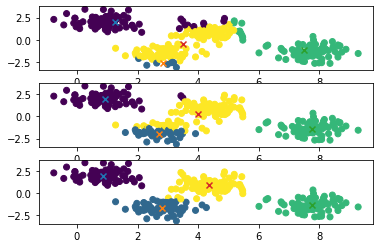

In [10]:
cdata,center_list=k_means(n=4,data=cdata,draw_plt=True,random_or_not=False)
get_SSE(cdata,center_list)

### (2) Re‐execute your K‐means clustering algorithm by changing K from 2 to 50 (from 2 to 10 is also okay). Plot the K value (x‐axis) vs. the value of Sum of Squared Error (SSE) (y‐axis) as below. Note that it is reasonable and acceptable if the curve is  凹凸不平. 

Text(0.5, 0, 'Number of k')

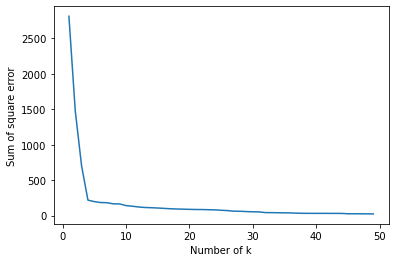

In [11]:
sse_in_k_cluster=[]
for t in range(1,50):
    cdata,center_list=k_means(t,cdata,False,False)
    sse_in_k_cluster.append(get_SSE(cdata,center_list))
plt.plot(range(1,50), sse_in_k_cluster)
plt.ylabel("Sum of square error") # y label
plt.xlabel("Number of k") # x label

### (3) Try 10 times of randomly initialized centroids, and plot their SSE values (y‐axis) such as below. 

Text(0.5, 1.0, 'Result of ten times randomly pick the initial points')

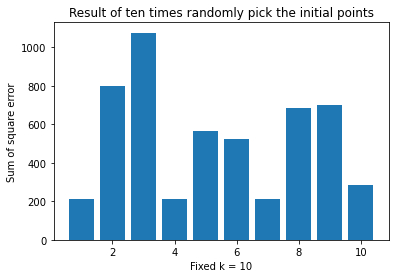

In [12]:
sse_in_10_cluster_10times=[]
for n in range(1,11):
    cdata,center_list=k_means(4,cdata,False,True)
    sse_in_10_cluster_10times.append(get_SSE(cdata,center_list))
plt.bar(range(1,11), sse_in_10_cluster_10times)
plt.ylabel("Sum of square error") # y label
plt.xlabel("Fixed k = 10") # x label
plt.title("Result of ten times randomly pick the initial points") 

## K-means的問題：
* 嚴重受到一開始初始值的影響
* 不適合不同Sizes、Densities、Non‐globular shapes、Non‐Convex的分群
* 受到異端值影響